### Exploratory Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
unicorn_df = pd.read_csv("../data/raw/Unicorn.csv")
unicorn_df.drop(unicorn_df.columns[0], axis=1, inplace=True)
unicorn_df.head()

Company  Valuation ($B) Date Joined        Country           City  \
0  Bytedance           140.0  2017-04-07          China        Beijing   
1     SpaceX           100.3  2012-12-01  United States      Hawthorne   
2     Stripe            95.0  2014-01-23  United States  San Francisco   
3     Klarna            45.6  2011-12-12         Sweden      Stockholm   
4      Canva            40.0  2018-01-08      Australia    Surry Hills   

                       Industry                      Investor 1  \
0       Artificial intelligence           Sequoia Capital China   
1                         Other                   Founders Fund   
2                       Fintech                 Khosla Ventures   
3                       Fintech  Institutional Venture Partners   
4  Internet software & services           Sequoia Capital China   

                Investor 2           Investor 3      Investor 4  
0     SIG Asia Investments           Sina Weibo  Softbank Group  
1  Draper Fisher Jurvetson  Rothenberg Ventures             NaN  
2         LowercaseCapital             capitalG             NaN  
3          Sequoia Capital     General Atlantic             NaN  
4       Blackbird Ventures      Matrix Partners             NaN

In [3]:
unicorn_df.shape

(936, 10)

In [4]:
train_df, test_df = train_test_split(unicorn_df, test_size=0.2, random_state=123)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 13 to 510
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         748 non-null    object 
 1   Valuation ($B)  748 non-null    float64
 2   Date Joined     748 non-null    object 
 3   Country         748 non-null    object 
 4   City            748 non-null    object 
 5   Industry        748 non-null    object 
 6   Investor 1      748 non-null    object 
 7   Investor 2      715 non-null    object 
 8   Investor 3      645 non-null    object 
 9   Investor 4      5 non-null      object 
dtypes: float64(1), object(9)
memory usage: 64.3+ KB


In [6]:
train_df.describe()

Valuation ($B)
count      748.000000
mean         3.316029
std          7.990923
min          1.000000
25%          1.050000
50%          1.570000
75%          3.000000
max        140.000000

In [7]:
profile = ProfileReport(train_df, title="Pandas Profiling Report")

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#profile.to_file("pandas_profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

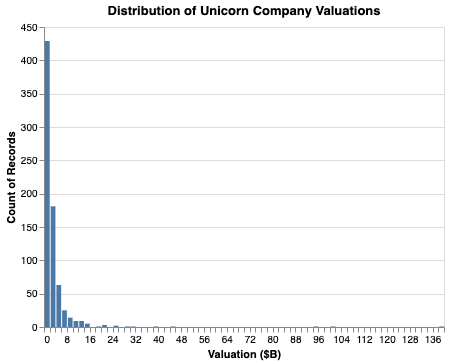

In [10]:
valuation_hist = alt.Chart(train_df, title="Distribution of Unicorn Company Valuations").mark_bar().encode(
    alt.X('Valuation ($B)', bin=alt.Bin(maxbins=100), title='Valuation ($B)'),
    y='count()')

# Show the plot
valuation_hist

In [30]:
np.percentile(train_df['Valuation ($B)'], [25 ,75])

array([1.05, 3.  ])

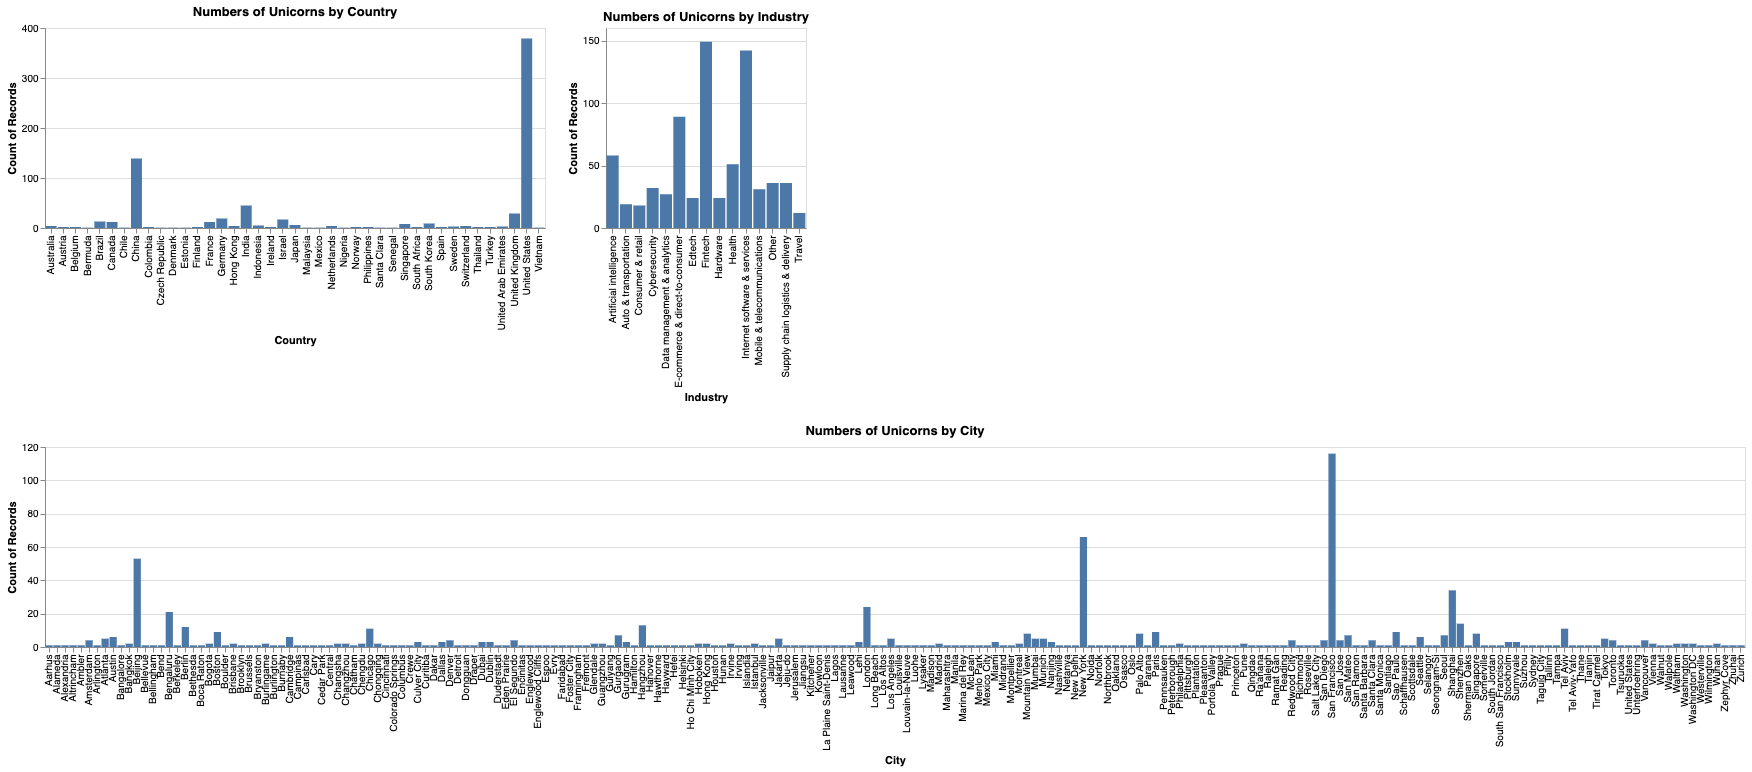

In [73]:
country_count = alt.Chart(train_df, title = 'Numbers of Unicorns by Country').mark_bar().encode(
                 alt.X('Country', type='nominal'),
                 y='count()',
                    ).properties(
                width=500,
                height=200)
city_count = alt.Chart(train_df, title='Numbers of Unicorns by City').mark_bar().encode(
                 alt.X('City', type='nominal'),
                 y='count()',
                    ).properties(
                width=1700,
                height=200)
industry_count = alt.Chart(train_df, title='Numbers of Unicorns by Industry').mark_bar().encode(
                 alt.X('Industry', type='nominal'),
                 y='count()',
                    ).properties(
                width=200,
                height=200)
(country_count | industry_count) & city_count

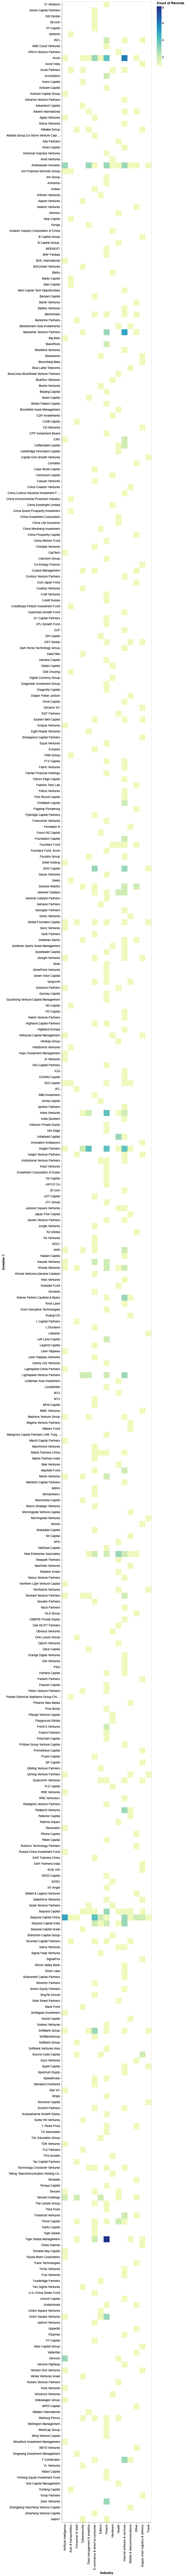

In [16]:
alt.Chart(train_df).mark_rect().encode(
    x='Industry',
    y='Investor 1',
    color='count()')

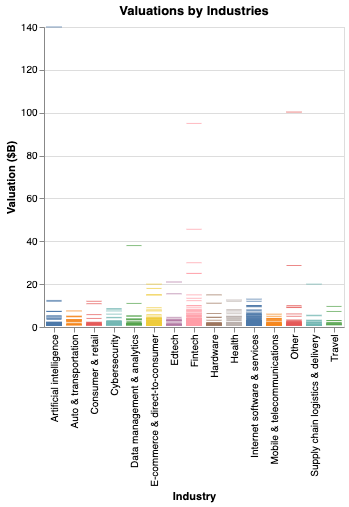

In [76]:
valuatio_industry_ticks = alt.Chart(train_df, title = 'Valuations by Industries').mark_tick().encode( 
    x='Industry',
    y='Valuation ($B)',
     color=alt.Color('Industry', legend=None))
valuatio_industry_ticks

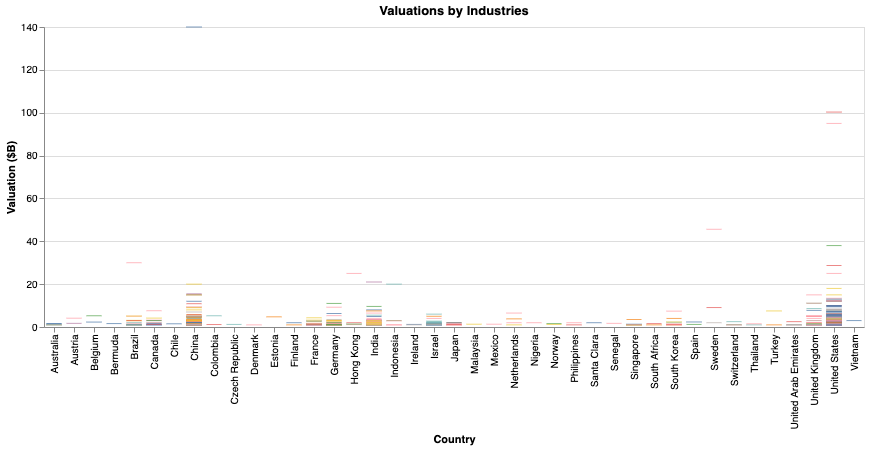

In [75]:
valuation_country_ticks = alt.Chart(train_df, title = 'Valuations by Industries').mark_tick().encode( 
    x='Country',
    y='Valuation ($B)',
     color=alt.Color('Industry', legend=None))
valuation_country_ticks